In [1]:
# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.dpi'] = 80
# Import Dataset
treatment = pd.read_csv("treatment.csv",low_memory=False)
treatment_age_and_sex = pd.read_csv("treatment_age_and_sex.csv",low_memory=False)
treatment_specialty = pd.read_csv("treatment_specialty.csv",low_memory=False)
treatment_simd = pd.read_csv("treatment_simd.csv",low_memory=False)

# Merge Datasets
### Deal with Simd

In [2]:
simd=treatment_simd
age_and_sex=treatment_age_and_sex

In [9]:
specialty=treatment_specialty
specialty_type=list(specialty['SpecialtyName'].unique())
SPECIALTY=pd.DataFrame(0,columns=specialty_type,index=age_and_sex.index)

In [10]:
specialty_type.index('Cardiology')

0

Drop the rows that have 'z' in QF columns.

In [11]:
SIMD=pd.DataFrame(0,columns = ["SIMD_5","SIMD_4", "SIMD_3", "SIMD_2","SIMD_1","SIMD_:"],index=age_and_sex.index)

In [12]:
n=len(age_and_sex)
Columns=list(age_and_sex.columns)
Q=Columns.index('Quarter')
L=Columns.index('Location')
A=Columns.index('AdmissionType')
for i in range(0,n):
    quarter=age_and_sex.iloc[i,Q]
    location=age_and_sex.iloc[i,L]
    admissiontype=age_and_sex.iloc[i,A]
    #Weighted Deprivation
    data1=simd[(simd['Quarter']==quarter) & (simd['Location']==location) &(simd['AdmissionType']==admissiontype)]
    #Select data from deprivation spreadsheet.
    data1=data1.sort_values(by='SIMD',ascending=False)#Order the dataset by 'SIMD'
    EpisodesSum1=sum(data1['Episodes'])
    m1=len(data1)
    
    if EpisodesSum1!=0: 
        # If the deprivation type is not empty.
        columns=list(data1.columns)#From SIMD spreadsheet, find the name of columns
        k=columns.index('Episodes')#Column number of 'Episodes'
        for j in range(0,m1):
            SIMD.iloc[i,j]=data1.iloc[j,k]/EpisodesSum1
    
    #Weighted specialty
    data2=specialty[(specialty['Quarter']==quarter) & (specialty['Location']==location) &(specialty['AdmissionType']==admissiontype)]
    #Select data from specialty spreadsheet.
    EpisodesSum2=sum(data2['Episodes'])
    m2=len(data2)
    if EpisodesSum2!=0: 
        columns=list(data2.columns) #From specialty spreadsheet, find the name of columns
        episodes_column=columns.index('Episodes')
        specialty_column=columns.index('SpecialtyName')
        for j in range(0,m2):
            value=data2.iloc[j,episodes_column]/EpisodesSum2
            S=data2.iloc[j,specialty_column]#For each row in the selected data, see which kind of specialty it has.
            position=specialty_type.index(S)#Find the column in new spreadsheet.
            SPECIALTY.iloc[i,position]=value

In [13]:
SPECIALTY

,Cardiology,Respiratory Medicine,General Surgery,Cardiothoracic Surgery,"Ear, Nose & Throat (ENT)",Ophthalmology,Trauma and Orthopaedic Surgery,Plastic Surgery,Urology,General Medicine,...,Neurology,Palliative Medicine,Neurosurgery,Clinical Genetics,Intensive Care Medicine,Clinical Radiology,Allergy,Immunology,Clinical Neurophysiology,Genito-Urinary Medicine
0,0.162341,0.023410,0.034097,0.279389,0.000000,0.000000,0.494656,0.006107,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.135069,0.022593,0.022102,0.298134,0.000000,0.000000,0.516699,0.005403,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.132389,0.019541,0.029311,0.294577,0.000000,0.000000,0.518808,0.005374,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.126046,0.020679,0.034466,0.286066,0.000000,0.000000,0.526342,0.006401,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.128128,0.017518,0.032533,0.284785,0.000000,0.000000,0.532032,0.005005,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130349,0.063695,0.107046,0.129844,0.000000,0.025018,0.000000,0.066045,0.000131,0.022250,0.240938,...,0.042907,0.0,0.024705,0.0,0.006764,0.0,0.0,0.0,0.0,0.0
130350,0.083811,0.004187,0.171965,0.000000,0.010932,0.024112,0.079237,0.000775,0.069546,0.378508,...,0.000000,0.0,0.000388,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
130351,0.000000,0.000000,0.380745,0.000000,0.016770,0.079503,0.126708,0.000000,0.037267,0.359006,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
130352,0.000000,0.000000,0.319351,0.000000,0.013982,0.091163,0.129195,0.000000,0.055369,0.390940,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [14]:
merged_data=pd.concat([age_and_sex,SIMD],axis=1)
merged_data=pd.concat([merged_data,SPECIALTY],axis=1)
merged_data

,Quarter,QuarterQF,HB,HBQF,Location,LocationQF,AdmissionType,AdmissionTypeQF,Sex,Age,...,Neurology,Palliative Medicine,Neurosurgery,Clinical Genetics,Intensive Care Medicine,Clinical Radiology,Allergy,Immunology,Clinical Neurophysiology,Genito-Urinary Medicine
0,2015Q3,NaN,SB0801,NaN,D102H,NaN,Elective Inpatients,NaN,Female,10-19 years,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,2015Q4,NaN,SB0801,NaN,D102H,NaN,Elective Inpatients,NaN,Female,10-19 years,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,2016Q1,NaN,SB0801,NaN,D102H,NaN,Elective Inpatients,NaN,Female,10-19 years,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,2016Q2,NaN,SB0801,NaN,D102H,NaN,Elective Inpatients,NaN,Female,10-19 years,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,2016Q3,NaN,SB0801,NaN,D102H,NaN,Elective Inpatients,NaN,Female,10-19 years,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130349,2018Q4,NaN,S08000031,NaN,G405H,NaN,All Inpatients and Daycases,d,Female,0-9 years,...,0.042907,0.0,0.024705,0.0,0.006764,0.0,0.0,0.0,0.0,0.0
130350,2018Q1,NaN,S08000031,NaN,C418H,NaN,All Inpatients and Daycases,d,Male,0-9 years,...,0.000000,0.0,0.000388,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
130351,2016Q4,NaN,S08000028,NaN,S08000028,d,All Inpatients and Daycases,d,Female,0-9 years,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
130352,2019Q4,NaN,S08000028,NaN,S08000028,d,All Inpatients and Daycases,d,Female,0-9 years,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [15]:
merged_data.to_csv('Merged_data.csv')

In [20]:
col=list(merged_data.columns)
QFcol=[]
Averagecol=[]
for i in col:
    if i.endswith('QF'):
        QFcol.append(i)
    if i.startswith('Average'):
        Averagecol.append(i)

for i in QFcol:
    ind=merged_data[i] != 'z'
    merged_data= merged_data.loc[ind,]
for i in Averagecol:
    merged_data[i] =merged_data[i].apply(pd.to_numeric,errors='coerce')

 
  
   
    
     
      
       
       . 

### Deprivation Analysis

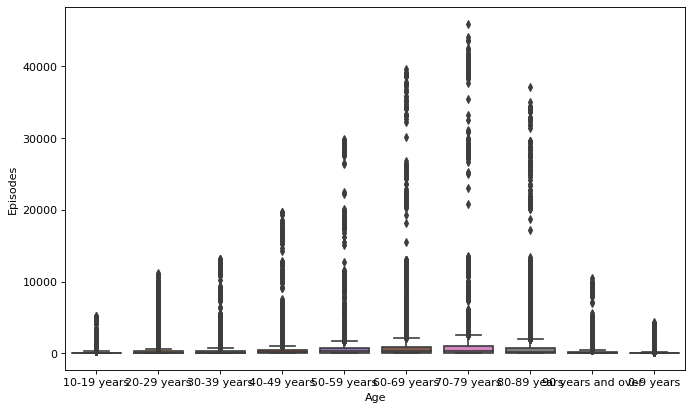

In [24]:
sns.boxplot(x="Age", y="Episodes", data=merged_data)

In [3]:
simd=treatment_simd
#simd=simd[simd['AdmissionType']=='Elective Inpatients']
simd['Year']=simd['Quarter'].map(lambda x:x.split('Q')[0])
simd['Quarters']='Q'+simd['Quarter'].map(lambda x:x.split('Q')[1])
display(simd)

,Quarter,QuarterQF,HB,HBQF,Location,LocationQF,AdmissionType,AdmissionTypeQF,SIMD,SIMDQF,Episodes,LengthOfEpisode,AverageLengthOfEpisode,AverageLengthOfEpisodeQF,Stays,LengthOfStay,AverageLengthOfStay,AverageLengthOfStayQF,Year,Quarters
0,2015Q3,NaN,SB0801,NaN,D102H,NaN,Elective Inpatients,NaN,1,NaN,428,1097,2.563084112,NaN,421,2341,5.560570071,NaN,2015,Q3
1,2015Q4,NaN,SB0801,NaN,D102H,NaN,Elective Inpatients,NaN,1,NaN,447,1299,2.906040268,NaN,452,2641,5.842920354,NaN,2015,Q4
2,2016Q1,NaN,SB0801,NaN,D102H,NaN,Elective Inpatients,NaN,1,NaN,474,1217,2.567510549,NaN,474,2499,5.272151899,NaN,2016,Q1
3,2016Q2,NaN,SB0801,NaN,D102H,NaN,Elective Inpatients,NaN,1,NaN,447,1221,2.731543624,NaN,440,2106,4.786363636,NaN,2016,Q2
4,2016Q3,NaN,SB0801,NaN,D102H,NaN,Elective Inpatients,NaN,1,NaN,393,855,2.175572519,NaN,402,2524,6.278606965,NaN,2016,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41143,2017Q3,NaN,S08000017,NaN,Y144H,NaN,All Inpatients and Daycases,d,,:,0,0,,z,0,0,,z,2017,Q3
41144,2017Q4,NaN,S08000017,NaN,Y144H,NaN,All Inpatients and Daycases,d,,:,0,0,,z,0,0,,z,2017,Q4
41145,2020Q1,NaN,S08000017,NaN,Y144H,NaN,All Inpatients and Daycases,d,,:,0,0,,z,0,0,,z,2020,Q1
41146,2015Q3,NaN,S08000028,NaN,S08000028,d,All Inpatients and Daycases,d,1,NaN,0,0,,z,0,0,,z,2015,Q3


In [16]:
simd_grouped=simd.groupby(['SIMD','HB','Location','AdmissionType','Year','Quarters']).mean()
display(simd_grouped)

Episodes  \
SIMD HB        Location AdmissionType  Year Quarters             
     S08000015 A101H    All Inpatients 2015 Q3               0   
                                            Q4               0   
                                       2016 Q1               0   
                                            Q2               0   
                                            Q4               0   
...                                                        ...   
5    SB0801    SB0801   Transfers      2019 Q3             287   
                                            Q4             313   
                                       2020 Q1             329   
                                            Q2             249   
                                            Q3             327   

                                                      LengthOfEpisode  Stays  \
SIMD HB        Location AdmissionType  Year Quarters                           
     S08000015 A101H    All Inpatients 2015 Q3                      0      0   
                                            Q4                      0      0   
                                       2016 Q1                      0      0   
                                            Q2                      0      0   
                                            Q4                      0      0   
...                                                               ...    ...   
5    SB0801    SB0801   Transfers      2019 Q3                    753      0   
                                            Q4                   1057      0   
                                       2020 Q1                    896      0   
                                            Q2                    789      0   
                                            Q3                    914      0   

                                                      LengthOfStay  
SIMD HB        Location AdmissionType  Year Quarters                
     S08000015 A101H    All Inpatients 2015 Q3                   0  
                                            Q4                   0  
                                       2016 Q1                   0  
                                            Q2                   0  
                                            Q4                   0  
...                                                            ...  
5    SB0801    SB0801   Transfers      2019 Q3                   0  
                                            Q4                   0  
                                       2020 Q1                   0  
                                            Q2                   0  
                                            Q3                   0  

[41148 rows x 4 columns]

In [57]:
simd_grouped

,SIMD,Episodes,LengthOfEpisode,AverageLengthOfEpisode,AverageLengthOfEpisodeQF,Stays,LengthOfStay,AverageLengthOfStay,AverageLengthOfStayQF,logAverageLengthOfEpisode
0,,109.907327,259.365479,2.065928,NaN,82.711266,320.325804,3.500175,NaN,-inf
1,1,3049.167225,8205.098491,2.569068,NaN,2206.624686,10746.095557,4.158738,NaN,-inf
2,2,2312.811668,6497.290189,2.711761,NaN,1725.167323,8631.296567,4.380309,NaN,-inf
3,3,1978.134756,5458.779337,2.642889,NaN,1507.502901,7316.292158,4.394635,NaN,-inf
4,4,1761.092429,4699.355880,2.515614,NaN,1372.935434,6287.068601,4.194392,NaN,-inf
5,5,1742.245599,4648.183361,2.450884,NaN,1362.567058,6191.427284,4.175695,NaN,-inf


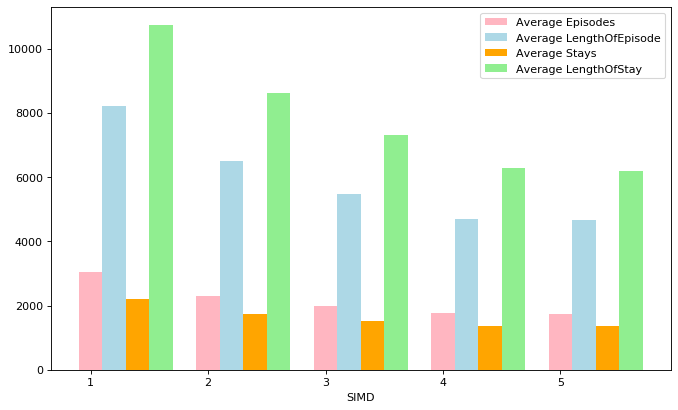

In [56]:
simd_grouped=simd.groupby(['SIMD']).mean().reset_index()
x=list(simd_grouped['SIMD'][1:6])
x=[int(i) for i in x]
y1=list(simd_grouped['Episodes'][1:6])
y2=list(simd_grouped['LengthOfEpisode'][1:6])
y3=list(simd_grouped['Stays'][1:6])
y4=list(simd_grouped['LengthOfStay'][1:6])
y1=[int(i) for i in y1]
y2=[int(i) for i in y2]
y3=[int(i) for i in y3]
y4=[int(i) for i in y4]
total_width, n = 0.8, 4
width = total_width / n
plt.bar(x,y1, width=width,label='Mean of Episodes', fc='lightpink')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x,y2, width=width,label='Mean of LengthOfEpisode', fc='lightblue')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x,y3, width=width,label='Mean of Stays', fc='orange')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x,y4, width=width,label='Mean of LengthOfStay', fc='lightgreen')
plt.xlabel("SIMD")
#plt.ylabel("Average Episodes")
plt.legend()
plt.show()

In [23]:
treatment_age_and_sex['Age'].value_counts()

70-79 years          14641
80-89 years          14568
60-69 years          14390
50-59 years          14126
40-49 years          13763
30-39 years          13404
20-29 years          13125
90 years and over    13028
10-19 years          12140
0-9 years             7169
Name: Age, dtype: int64

In [6]:
display(simd)

,Quarter,QuarterQF,HB,HBQF,Location,LocationQF,AdmissionType,AdmissionTypeQF,SIMD,SIMDQF,Episodes,LengthOfEpisode,AverageLengthOfEpisode,AverageLengthOfEpisodeQF,Stays,LengthOfStay,AverageLengthOfStay,AverageLengthOfStayQF,Year,Quarters
0,2015Q3,NaN,SB0801,NaN,D102H,NaN,Elective Inpatients,NaN,1,NaN,428,1097,2.563084112,NaN,421,2341,5.560570071,NaN,2015,Q3
1,2015Q4,NaN,SB0801,NaN,D102H,NaN,Elective Inpatients,NaN,1,NaN,447,1299,2.906040268,NaN,452,2641,5.842920354,NaN,2015,Q4
2,2016Q1,NaN,SB0801,NaN,D102H,NaN,Elective Inpatients,NaN,1,NaN,474,1217,2.567510549,NaN,474,2499,5.272151899,NaN,2016,Q1
3,2016Q2,NaN,SB0801,NaN,D102H,NaN,Elective Inpatients,NaN,1,NaN,447,1221,2.731543624,NaN,440,2106,4.786363636,NaN,2016,Q2
4,2016Q3,NaN,SB0801,NaN,D102H,NaN,Elective Inpatients,NaN,1,NaN,393,855,2.175572519,NaN,402,2524,6.278606965,NaN,2016,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41143,2017Q3,NaN,S08000017,NaN,Y144H,NaN,All Inpatients and Daycases,d,,:,0,0,,z,0,0,,z,2017,Q3
41144,2017Q4,NaN,S08000017,NaN,Y144H,NaN,All Inpatients and Daycases,d,,:,0,0,,z,0,0,,z,2017,Q4
41145,2020Q1,NaN,S08000017,NaN,Y144H,NaN,All Inpatients and Daycases,d,,:,0,0,,z,0,0,,z,2020,Q1
41146,2015Q3,NaN,S08000028,NaN,S08000028,d,All Inpatients and Daycases,d,1,NaN,0,0,,z,0,0,,z,2015,Q3


In [40]:
col=list(simd.columns)
QFcol=[]
Averagecol=[]
for i in col:
    if i.endswith('QF'):
        QFcol.append(i)
    if i.startswith('Average'):
        Averagecol.append(i)

for i in QFcol:
    ind=simd[i] != 'z'
    simd= simd.loc[ind,]
for i in Averagecol:
    simd[i] = simd[i].apply(pd.to_numeric,errors='coerce')
simd

,Quarter,QuarterQF,HB,HBQF,Location,LocationQF,AdmissionType,AdmissionTypeQF,SIMD,SIMDQF,Episodes,LengthOfEpisode,AverageLengthOfEpisode,AverageLengthOfEpisodeQF,Stays,LengthOfStay,AverageLengthOfStay,AverageLengthOfStayQF,Year,Quarters
0,2015Q3,NaN,SB0801,NaN,D102H,NaN,Elective Inpatients,NaN,1,NaN,428,1097,2.563084,NaN,421,2341,5.560570,NaN,2015,Q3
1,2015Q4,NaN,SB0801,NaN,D102H,NaN,Elective Inpatients,NaN,1,NaN,447,1299,2.906040,NaN,452,2641,5.842920,NaN,2015,Q4
2,2016Q1,NaN,SB0801,NaN,D102H,NaN,Elective Inpatients,NaN,1,NaN,474,1217,2.567511,NaN,474,2499,5.272152,NaN,2016,Q1
3,2016Q2,NaN,SB0801,NaN,D102H,NaN,Elective Inpatients,NaN,1,NaN,447,1221,2.731544,NaN,440,2106,4.786364,NaN,2016,Q2
4,2016Q3,NaN,SB0801,NaN,D102H,NaN,Elective Inpatients,NaN,1,NaN,393,855,2.175573,NaN,402,2524,6.278607,NaN,2016,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36512,2019Q3,NaN,S92000003,d,S92000003,d,All Inpatients and Daycases,d,,:,3330,7876,2.365165,NaN,2210,7800,3.529412,NaN,2019,Q3
36513,2019Q4,NaN,S92000003,d,S92000003,d,All Inpatients and Daycases,d,,:,2148,5220,2.430168,NaN,1356,5507,4.061209,NaN,2019,Q4
36514,2020Q1,NaN,S92000003,d,S92000003,d,All Inpatients and Daycases,d,,:,1511,4051,2.681006,NaN,996,4857,4.876506,NaN,2020,Q1
36515,2020Q2,NaN,S92000003,d,S92000003,d,All Inpatients and Daycases,d,,:,843,1901,2.255042,NaN,569,1738,3.054482,NaN,2020,Q2


In [17]:
sns.boxplot(x="SIMD", y="AverageLengthOfEpisode", data=merged_data)

ValueError: Could not interpret input 'SIMD'

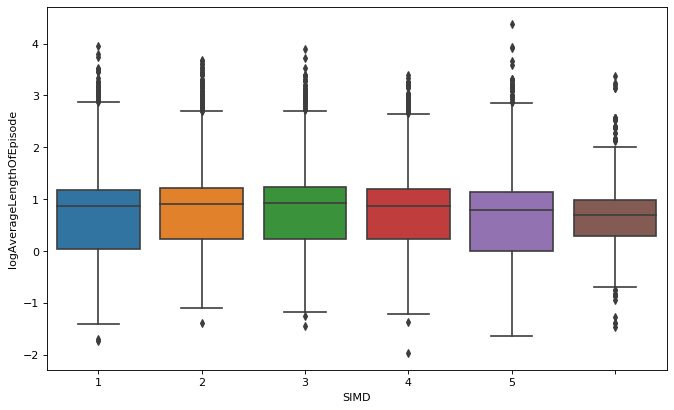

In [55]:
logAverageLengthOfEpisode=np.log(simd['AverageLengthOfEpisode'])
#for i in simd['AverageLengthOfEpisode']:
    #print(np.log(i))
simd['logAverageLengthOfEpisode']=logAverageLengthOfEpisode
sns.boxplot(x="SIMD", y="logAverageLengthOfEpisode", data=simd)

D:\software\anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


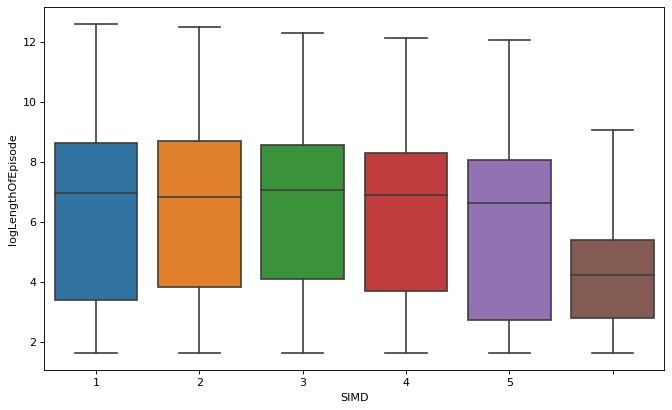

In [60]:
logLengthOfEpisode=np.log(simd['LengthOfEpisode'])
simd['logLengthOfEpisode']=logLengthOfEpisode
sns.boxplot(x="SIMD", y="logLengthOfEpisode", data=simd)